Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)
Number of classes: 10
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Model Architecture:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 2, 2, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,111,242 (57.64 MB)

 Trainable params: 396,554 (1.51 MB)

 Non-trainable params: 14,714,688 (56.13 MB)


Training VGG16 model...
Epoch 1/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 35s 8ms/step - accuracy: 0.4925 - loss: 2.2841 - val_accuracy: 0.7132 - val_loss: 0.8856 - learning_rate: 0.0010
Epoch 2/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 26s 8ms/step - accuracy: 0.6692 - loss: 1.0132 - val_accuracy: 0.7350 - val_loss: 0.8099 - learning_rate: 0.0010
Epoch 3/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 25s 8ms/step - accuracy: 0.6923 - loss: 0.9547 - val_accuracy: 0.7351 - val_loss: 0.7975 - learning_rate: 0.0010
Epoch 4/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 38s 7ms/step - accuracy: 0.7025 - loss: 0.9215 - val_accuracy: 0.7294 - val_loss: 0.8028 - learning_rate: 0.0010
Epoch 5/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7100 - loss: 0.9074 - val_accuracy: 0.7491 - val_loss: 0.7780 - learning_rate: 0.0010
Epoch 6/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 23s 7ms/step - accuracy: 0.7188 - loss: 0.8841 - val_accuracy: 0.7496 - val_loss: 0.7706 - learning_rate: 0.0010
Epoch 7/20
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 24s

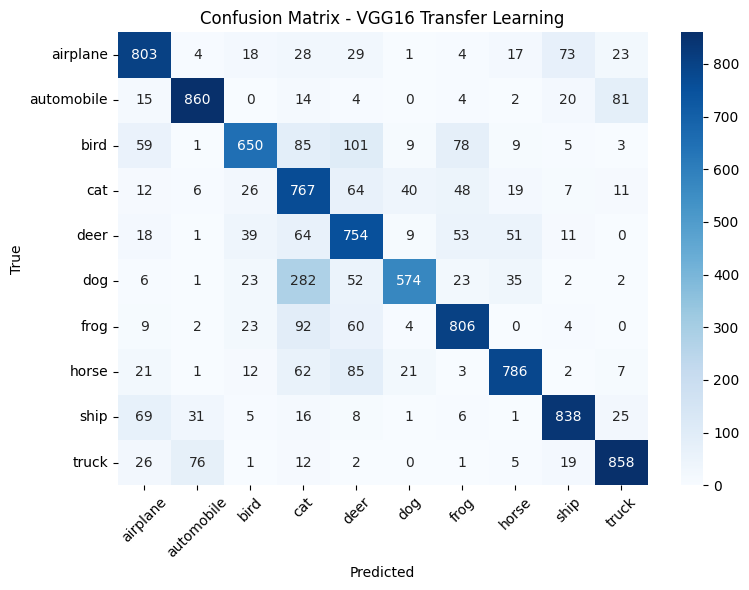


🔧 Starting Fine-Tuning...
Trainable layers after unfreezing:
Layer 15: block5_conv1
Layer 16: block5_conv2
Layer 17: block5_conv3
Layer 18: block5_pool

Fine-tuning for 5 additional epochs...
Epoch 15/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.7883 - loss: 0.6623 - val_accuracy: 0.8081 - val_loss: 0.6214 - learning_rate: 1.0000e-05
Epoch 16/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - accuracy: 0.8370 - loss: 0.5029 - val_accuracy: 0.8267 - val_loss: 0.5710 - learning_rate: 1.0000e-05
Epoch 17/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.8637 - loss: 0.4163 - val_accuracy: 0.8357 - val_loss: 0.5469 - learning_rate: 1.0000e-05
Epoch 18/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.8844 - loss: 0.3442 - val_accuracy: 0.8485 - val_loss: 0.5466 - learning_rate: 1.0000e-05
Epoch 19/25
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.9051 - loss: 0.2840 - val_accuracy: 0.8517 - val_loss: 0.5284 - learning_rate: 1.0000e-05
Epoch 2

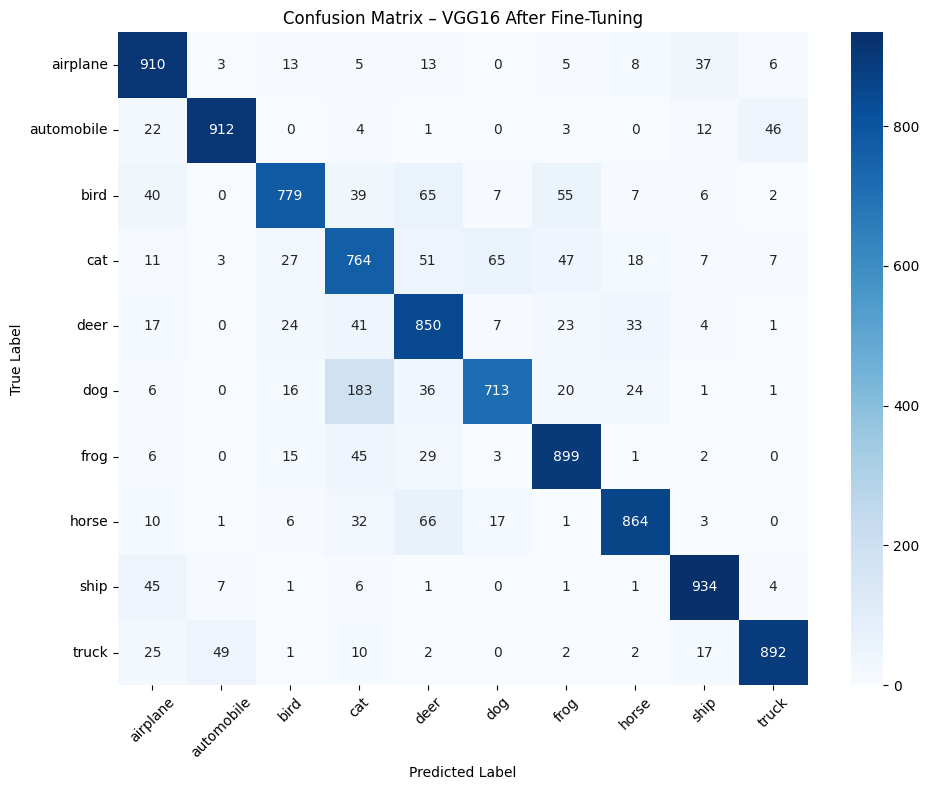

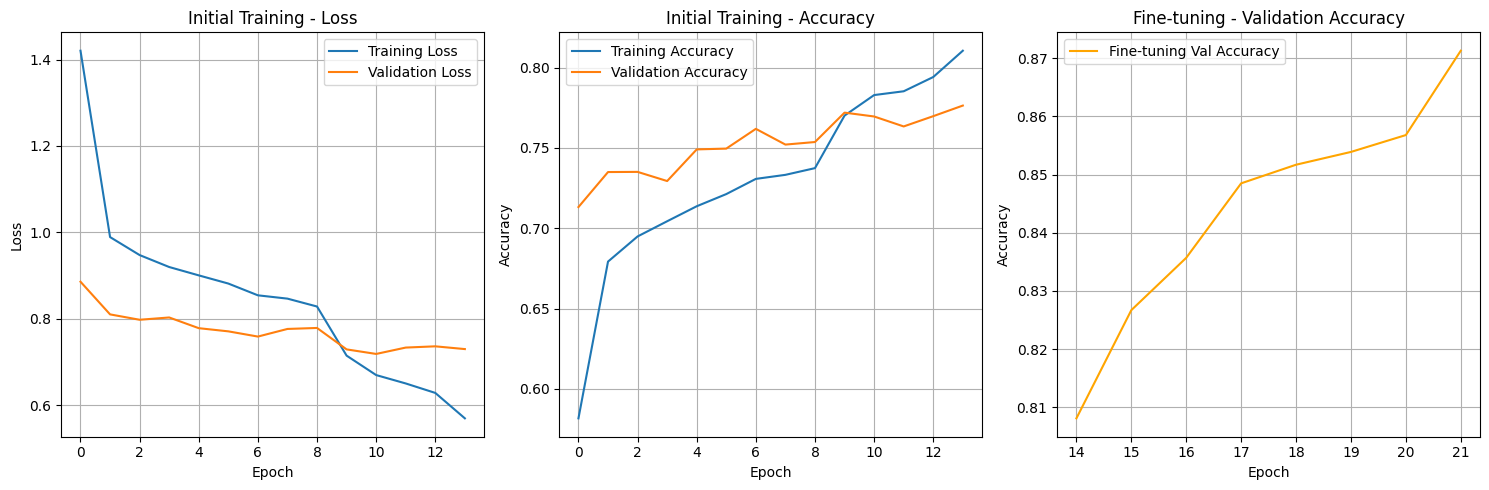


✅ Training and evaluation completed!


In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.mixed_precision import set_global_policy
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Enable mixed precision (optional, speeds up training on compatible GPUs like T4 in Colab)
set_global_policy("mixed_float16")

# Load CIFAR-10 dataset
print("Loading CIFAR-10 dataset...")
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize pixel values to [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Flatten labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# CIFAR-10 class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Number of classes: {len(class_names)}")

# Parameters
IMG_SIZE = 64  # VGG16 works well with 128x128 or larger images
BATCH_SIZE = 16
EPOCHS = 20
NUM_CLASSES = 10

# Preprocessing function for resizing and preparing inputs for VGG16
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = preprocess_input(image * 255.0)  # VGG16 expects inputs in [0,255]
    label = tf.one_hot(label, NUM_CLASSES)
    return image, label

# Create efficient training and test datasets using tf.data
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)) \
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
    .shuffle(5000) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)) \
    .map(preprocess, num_parallel_calls=tf.data.AUTOTUNE) \
    .batch(BATCH_SIZE) \
    .prefetch(tf.data.AUTOTUNE)

# Load VGG16 without the top classifier and freeze its layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(IMG_SIZE, IMG_SIZE, 3))
base_model.trainable = False  # Freeze all convolutional layers

# Build the final model
model_VGG = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),  # VGG typically uses larger dense layers
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(NUM_CLASSES, activation='softmax', dtype='float32')  # Ensure float32 output with mixed precision
])

# Compile the model
model_VGG.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
print("\nModel Architecture:")
model_VGG.summary()

# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)
]

# Train the model
print("\nTraining VGG16 model...")
history_vgg = model_VGG.fit(
    train_dataset,
    epochs=EPOCHS,
    validation_data=test_dataset,
    callbacks=callbacks
)

# Step 1: Get model predictions (probabilities)
print("\nEvaluating initial model...")
y_pred_probs = model_VGG.predict(test_dataset)  # This returns an array of shape (num_samples, 10)

# Step 2: Convert predicted probabilities to class indices
y_pred = y_pred_probs.argmax(axis=1)

# Step 3: Rebuild y_true from test labels
# Extract true labels from the dataset (this works because test_dataset is not shuffled)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_true = tf.argmax(y_true, axis=1).numpy()  # Convert one-hot back to integers

# Step 4: Compute metrics
acc = accuracy_score(y_true, y_pred)
prec = precision_score(y_true, y_pred, average='weighted')
rec = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

# Step 5: Print results
print("\n🔍 VGG16 Transfer Learning Results:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

report = classification_report(y_true, y_pred, target_names=class_names)
print("\nClassification Report:")
print(report)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - VGG16 Transfer Learning')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# FINE-TUNING SECTION
print("\n🔧 Starting Fine-Tuning...")

# Unfreeze the last N layers of VGG16
# VGG16 has 19 layers (including pooling), so we'll unfreeze the last few conv blocks
fine_tune_at = 15  # Unfreeze from layer 15 onwards (last conv block)

base_model.trainable = True

# Freeze all layers before `fine_tune_at`
for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False

# Print which layers are trainable
print("Trainable layers after unfreezing:")
for i, layer in enumerate(base_model.layers):
    if layer.trainable:
        print(f"Layer {i}: {layer.name}")

# Recompile with lower learning rate for fine-tuning
model_VGG.compile(
    optimizer=Adam(learning_rate=1e-5),  # Much smaller LR for fine-tuning
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_tune_epochs = 5  # Can adjust based on available time/resources

print(f"\nFine-tuning for {fine_tune_epochs} additional epochs...")
history_finetune = model_VGG.fit(
    train_dataset,
    epochs=EPOCHS + fine_tune_epochs,
    initial_epoch=len(history_vgg.history['loss']),  # continue from previous training
    validation_data=test_dataset,
    callbacks=callbacks
)

# Predict class probabilities using the fine-tuned model
print("\nEvaluating fine-tuned model...")
y_pred_probs_ft = model_VGG.predict(test_dataset)

# Convert probabilities to class predictions
y_pred_ft = y_pred_probs_ft.argmax(axis=1)

# Convert one-hot labels back to integers (reuse y_true from before)
y_true = np.concatenate([y for x, y in test_dataset], axis=0)
y_true = tf.argmax(y_true, axis=1).numpy()

acc_ft = accuracy_score(y_true, y_pred_ft)
prec_ft = precision_score(y_true, y_pred_ft, average='weighted')
rec_ft = recall_score(y_true, y_pred_ft, average='weighted')
f1_ft = f1_score(y_true, y_pred_ft, average='weighted')

print("\n🔍 Metrics after Fine-Tuning VGG16:")
print(f"Accuracy:  {acc_ft:.4f} (Improvement: {acc_ft - acc:+.4f})")
print(f"Precision: {prec_ft:.4f} (Improvement: {prec_ft - prec:+.4f})")
print(f"Recall:    {rec_ft:.4f} (Improvement: {rec_ft - rec:+.4f})")
print(f"F1 Score:  {f1_ft:.4f} (Improvement: {f1_ft - f1:+.4f})")

cm_ft = confusion_matrix(y_true, y_pred_ft)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_ft, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix – VGG16 After Fine-Tuning')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Plot training history
plt.figure(figsize=(15, 5))

# Plot initial training
plt.subplot(1, 3, 1)
plt.plot(history_vgg.history['loss'], label='Training Loss')
plt.plot(history_vgg.history['val_loss'], label='Validation Loss')
plt.title('Initial Training - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.subplot(1, 3, 2)
plt.plot(history_vgg.history['accuracy'], label='Training Accuracy')
plt.plot(history_vgg.history['val_accuracy'], label='Validation Accuracy')
plt.title('Initial Training - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot fine-tuning
plt.subplot(1, 3, 3)
if len(history_finetune.history['val_accuracy']) > 0:
    epochs_range = range(len(history_vgg.history['loss']),
                        len(history_vgg.history['loss']) + len(history_finetune.history['val_accuracy']))
    plt.plot(epochs_range, history_finetune.history['val_accuracy'], label='Fine-tuning Val Accuracy', color='orange')
    plt.title('Fine-tuning - Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
else:
    plt.text(0.5, 0.5, 'No fine-tuning data\n(training stopped early)',
             ha='center', va='center', transform=plt.gca().transAxes)
    plt.title('Fine-tuning - Validation Accuracy')

plt.tight_layout()
plt.show()

print("\n✅ Training and evaluation completed!")